### 제1절. 단순 선형 회귀

#### 2. 정규방정식

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv')

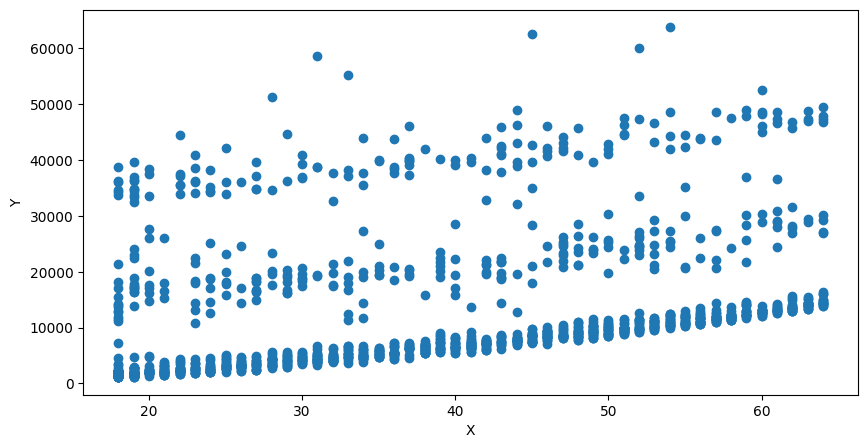

In [3]:
x = data['age']
y = data['charges']

plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [4]:
print(x.shape, y.shape)
x = np.array(x)
y = np.array(y)
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

(1338,) (1338,)


In [5]:
lr = LinearRegression()
lr.fit(x, y)
print("절편", lr.intercept_, "계수", lr.coef_)
print(lr.score(x, y))  # 결정계수

절편 [3165.88500606] 계수 [[257.72261867]]
0.08940589967885804


In [6]:
x_new = [[19], [64]]
y_hat = lr.predict(x_new)
print(y_hat)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]
[[ 8062.61476073]
 [19660.13260074]]


#### 3. 경사하강법
- 최적화알고리즘

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor

data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv')
x = np.array(data['age'])
y = np.array(data['charges'])
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

In [8]:
sgd_reg = SGDRegressor(max_iter=1000, random_state=200)
sgd_reg.fit(x, y.ravel())  # y.ravel : 다차원 -> 1차원으로 바꿔주는 함수, flatten과 비슷함

SGDRegressor(random_state=200)

In [9]:
print("절편", sgd_reg.intercept_, "계수", sgd_reg.coef_)

절편 [-507.07230083] 계수 [772.38069104]


In [10]:
# 새로운 값 예측
x_new = [[19], [64]]
y_hat = sgd_reg.predict(x_new)
print(y_hat)

[14168.16082885 48925.29192548]


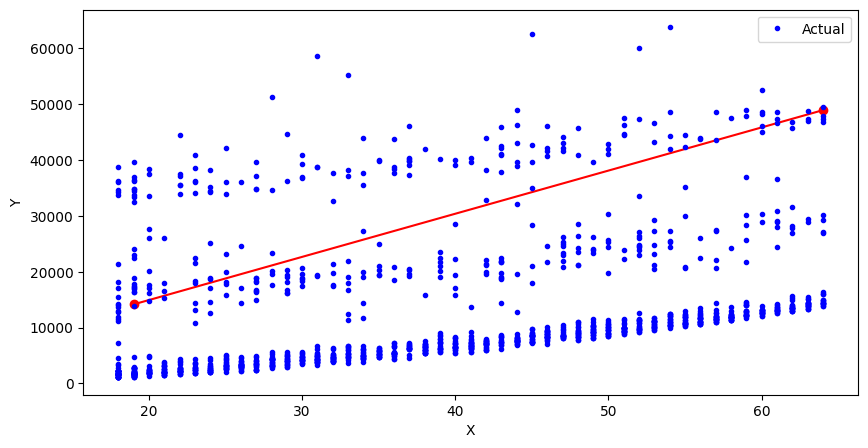

In [11]:
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, 'ro-')
plt.plot(x, y, "b.", label="Actual")
plt.legend(loc="upper right")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 제2절. 다항회귀

In [12]:
import pandas as pd
cereal = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cereal.csv")
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [13]:
cereal = cereal[cereal.columns[3:]]
cereal = cereal[cereal.sugars >= 0]  # 설탕이 함유된 데이터에 대해서만 분석 
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [14]:
import matplotlib.pyplot as plt
cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace=True)

C:\Users\thdus\AppData\Local\Temp\ipykernel_23028\3676420722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by=['sugars'], inplace=True)


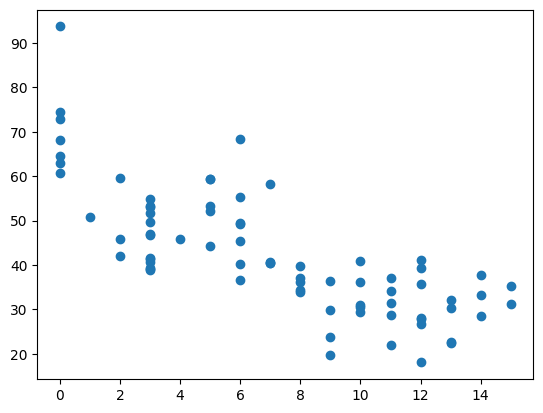

In [15]:
cereal2.reset_index(drop=True, inplace=True)
x = cereal2['sugars'].values
y = cereal2['rating'].values
plt.scatter(x, y)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [17]:
X_train.reshape(-1, 1).shape

(53, 1)

In [18]:
X_train

array([11,  6, 10,  6, 12,  7,  3, 13,  0, 11,  9, 12,  8,  4,  2,  3,  0,
       13,  9,  1, 14, 10,  3,  3,  6,  6,  9,  8, 10,  3,  0, 12,  3,  5,
        5,  8,  3, 13,  3, 15, 12,  3, 10,  5,  0,  0,  3, 12,  0,  2, 14,
        3,  7], dtype=int64)

In [19]:
X_train.shape

(53,)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
# X_train을 polynomial 의 값으로 변환
X_poly = poly_reg.fit_transform(X_train.reshape(-1, 1))  # 절편까지 포함

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)


LinearRegression()

In [21]:
# X_test도  polynomial 값으로 변환
X_test_poly = poly_reg.transform(X_test.reshape(-1, 1))
pred = reg.predict(X_test_poly)

np.set_printoptions(precision=2)
np.concatenate((pred.reshape(len(pred), 1), 
                y_test.reshape(len(y_test), 1)),
                1)


array([[51.63, 46.66],
       [32.1 , 28.74],
       [55.79, 59.64],
       [31.08, 37.84],
       [32.1 , 31.44],
       [44.46, 44.33],
       [38.82, 40.4 ],
       [41.45, 55.33],
       [41.45, 49.12],
       [31.38, 27.75],
       [36.56, 34.38],
       [34.7 , 29.92],
       [65.25, 63.01],
       [33.21, 31.07],
       [44.46, 52.08],
       [38.82, 40.45],
       [51.63, 53.13],
       [36.56, 33.98],
       [41.45, 49.51],
       [31.04, 22.74],
       [31.38, 39.26],
       [31.5 , 31.23],
       [32.1 , 21.87]])

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test.reshape(-1, 1)), y_test)

print("MAE\t{}".format(round(mae, 3)))
print("RMSE\t{}".format(round(rmse, 3)))
print("R2\t{}".format(round(acc*100, 3)))

MAE	4.606
RMSE	5.794
R2	74.376


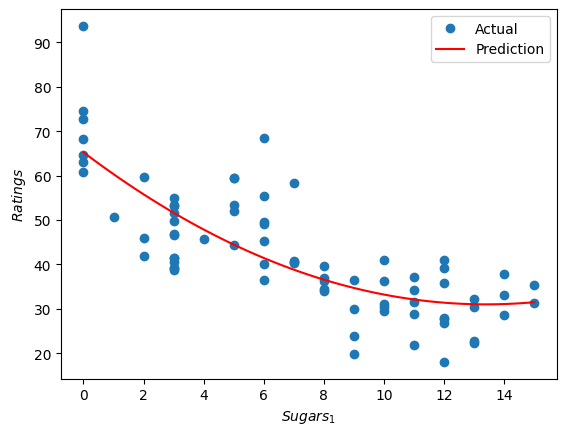

In [23]:
X_new = np.linspace(0, 15, 100).reshape(100, 1)
X_new_poly = poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

plt.plot(x, y, 'o', label="Actual")
plt.plot(X_new, y_new, 'r-', label='Prediction')
plt.legend(loc="upper right")
plt.xlabel("$Sugars_1$")
plt.ylabel("$Ratings$")
plt.show()

In [32]:
X = cereal.iloc[:, :-1].values
y = cereal.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53, 12) (23, 12) (53,) (23,)


In [33]:
from sklearn.preprocessing import StandardScaler
# 표준화/정규화
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

from sklearn.linear_model import LinearRegression
X_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [34]:
import numpy as np
X_test_poly = poly_reg.transform(X_test)
pred = reg.predict(X_test_poly)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(X_test_poly, y_test)

print("MAE\t{}".format(round(mae, 3)))
print("RMSE\t{}".format(round(rmse, 3)))
print("R2\t{}".format(round(acc*100, 3)))

MAE	2.215
RMSE	3.179
R2	92.248


### 제3절. 다중회귀

#### 3. 규제가 있는 다항 회귀 모델

In [37]:
# 릿지
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target


In [49]:
from sklearn.linear_model import Ridge
import numpy as np

alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha): 
    ridge = Ridge(alpha=a, random_state=45)
    ridge.fit(X, y)
    print(ridge.coef_)
    data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha)
df_ridge.columns = X.columns
df_ridge

[  -9.55 -239.09  520.37  323.82 -712.32  413.38   65.81  167.51  720.94
   68.12]
[  -7.2  -234.55  520.59  320.52 -380.61  150.48  -78.59  130.31  592.35
   71.13]
[   1.31 -207.19  489.7   301.76  -83.47  -70.83 -188.68  115.71  443.81
   86.75]
[  29.47  -83.15  306.35  201.63    5.91  -29.52 -152.04  117.31  262.94
  111.88]
[ 19.81  -0.92  75.42  55.03  19.92  13.95 -47.55  48.26  70.14  44.21]


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


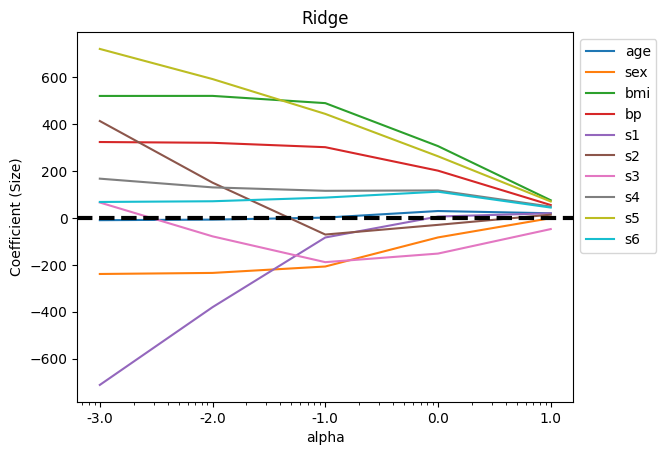

In [51]:
import matplotlib.pyplot as plt

plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1,1))
plt.title("Ridge")
plt.xlabel("alpha")
plt.ylabel('Coefficient (Size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

In [53]:
# 라쏘
from sklearn.linear_model import Lasso

alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a, random_state=45)
    lasso.fit(X, y)
    data.append(pd.Series(np.hstack([lasso.coef_])))


df_lasso = pd.DataFrame(data, index=alpha)
df_lasso.columns = X.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


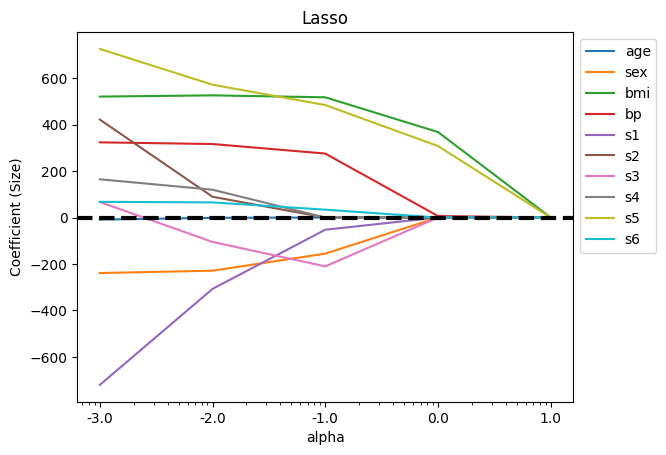

In [54]:
import matplotlib.pyplot as plt

plt.semilogx(df_lasso)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_lasso.columns, bbox_to_anchor=(1,1))
plt.title("Lasso")
plt.xlabel("alpha")
plt.ylabel('Coefficient (Size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

In [55]:
# 엘라스틱넷
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    elasticnet = ElasticNet(alpha=a, random_state=45)
    elasticnet.fit(X, y)
    data.append(pd.Series(np.hstack([elasticnet.coef_])))


df_elasticnet = pd.DataFrame(data, index=alpha)
df_elasticnet.columns = X.columns
df_elasticnet

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


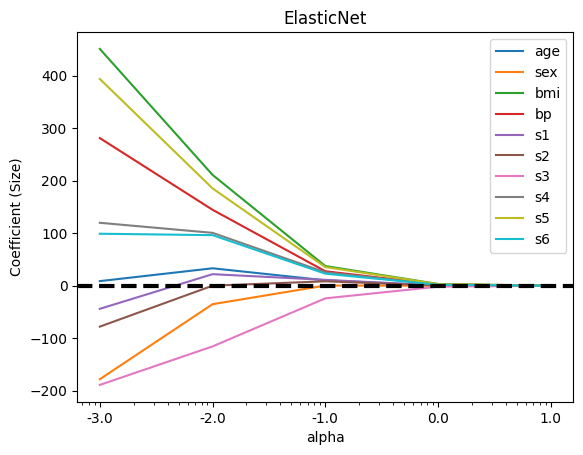

In [56]:
import matplotlib.pyplot as plt

plt.semilogx(df_elasticnet)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_elasticnet.columns, bbox_to_anchor=(1,1))
plt.title("ElasticNet")
plt.xlabel("alpha")
plt.ylabel('Coefficient (Size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

### 제4절. 로지스틱 회귀

In [57]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")   

body = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/bodyPerformance.csv")
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [58]:
body['gender'] = np.where(body['gender']=="M", 0, 1)
body['class_1'] = np.where(body['class']=="A", 1, 0)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [62]:
body.columns.difference(["class", "class_1"])

Index(['age', 'body fat_%', 'broad jump_cm', 'diastolic', 'gender',
       'gripForce', 'height_cm', 'sit and bend forward_cm', 'sit-ups counts',
       'systolic', 'weight_kg'],
      dtype='object')

In [67]:
from sklearn.model_selection import train_test_split
X = body[body.columns.difference(["class", "class_1"])]
y = body['class_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    test_size=0.3, 
                                                    random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=45)
lr.fit(X_train, y_train)

LogisticRegression(random_state=45)

In [72]:
proba = pd.DataFrame(lr.predict_proba(X_train))
confidence_score = pd.DataFrame(lr.decision_function(X_train))
confidence_score

,0
0,-1.889286
1,0.885502
2,-0.240677
3,1.236175
4,-6.838532
...,...
9370,1.696958
9371,-3.850142
9372,-9.236338
9373,3.050219


In [73]:
df = pd.concat([proba, confidence_score], axis=1)
df.columns = ["Not A (=0)", "A", "DecisionFunction"]
df

,Not A (=0),A,DecisionFunction
0,0.868674,0.131326,-1.889286
1,0.292039,0.707961,0.885502
2,0.559880,0.440120,-0.240677
3,0.225102,0.774898,1.236175
4,0.998929,0.001071,-6.838532
...,...,...,...
9370,0.154863,0.845137,1.696958
9371,0.979167,0.020833,-3.850142
9372,0.999903,0.000097,-9.236338
9373,0.045208,0.954792,3.050219


In [77]:
df.sort_values('DecisionFunction', inplace=True)
df

,Not A (=0),A,DecisionFunction
5957,1.000000,6.449139e-09,-18.859319
3607,1.000000,3.056294e-08,-17.303478
497,1.000000,3.396676e-08,-17.197883
4459,1.000000,5.143742e-08,-16.782900
5821,1.000000,6.810482e-08,-16.502218
...,...,...,...
2135,0.001598,9.984017e-01,6.437245
4722,0.001545,9.984546e-01,6.470902
4156,0.001308,9.986924e-01,6.638249
4558,0.000533,9.994671e-01,7.536711


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
